In [1]:
#US state unemployment data from Bureau of Labor Statistics

In [2]:
import pandas as pd

%matplotlib inline

pd.__version__

'2.2.3'

In [3]:
## Load up the data -- this will take a couple seconds
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"

In [4]:
unemp_raw = pd.read_csv("state_unemployment.csv", parse_dates=["Date"])


In [5]:
unemp_raw.head()

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0


In [6]:
# Don't worry about the details here quite yet
unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)
unemp_all.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8


In [7]:
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]
unemp = unemp_all[states]
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


<Axes: xlabel='Date'>

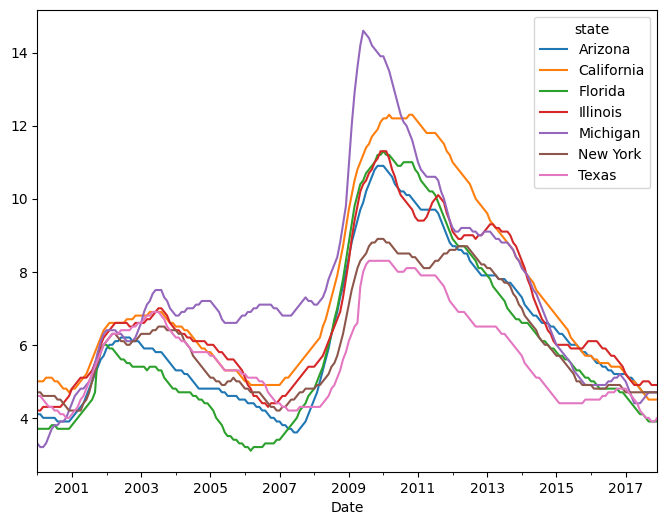

In [8]:
unemp.plot(figsize=(8, 6))

In [9]:
unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [10]:
# Data corresponding to a single date
unemp.loc["01/01/2000", :]

state
Arizona       4.1
California    5.0
Florida       3.7
Illinois      4.2
Michigan      3.3
New York      4.7
Texas         4.6
Name: 2000-01-01 00:00:00, dtype: float64

In [11]:
# Data for all days between New Years Day and June first in the year 2000
unemp.loc["01/01/2000":"06/01/2000", :]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
2000-06-01,4.0,5.1,3.8,4.3,3.7,4.6,4.3


In [12]:
unemp.mean()

state
Arizona       6.301389
California    7.299074
Florida       6.048611
Illinois      6.822685
Michigan      7.492593
New York      6.102315
Texas         5.695370
dtype: float64

In [13]:
unemp.var(axis=1).head()


Date
2000-01-01    0.352381
2000-02-01    0.384762
2000-03-01    0.364762
2000-04-01    0.353333
2000-05-01    0.294762
dtype: float64

In [14]:
unemp.var(axis=0).head()

state
Arizona       4.179021
California    6.039162
Florida       5.780556
Illinois      3.846785
Michigan      6.817340
dtype: float64

In [15]:
#
# Step 1: We write the (aggregation) function that we'd like to use
#
def high_or_low(s):
    """
    This function takes a pandas Series object and returns high
    if the mean is above 6.5 and low if the mean is below 6.5
    """
    if s.mean() < 6.5:
        out = "Low"
    else:
        out = "High"

    return out

In [16]:
#
# Step 2: Apply it via the agg method.
#
unemp.agg(high_or_low)

state
Arizona        Low
California    High
Florida        Low
Illinois      High
Michigan      High
New York       Low
Texas          Low
dtype: object

In [17]:
# How does this differ from unemp.agg(high_or_low)?
unemp.agg(high_or_low, axis=1).head()

Date
2000-01-01    Low
2000-02-01    Low
2000-03-01    Low
2000-04-01    Low
2000-05-01    Low
dtype: object

In [18]:
unemp.agg([min, max, high_or_low])

/var/folders/qd/4_fy4_zj6cg6rzqqrkmqykn80000gn/T/ipykernel_1425/286408109.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  unemp.agg([min, max, high_or_low])
/var/folders/qd/4_fy4_zj6cg6rzqqrkmqykn80000gn/T/ipykernel_1425/286408109.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  unemp.agg([min, max, high_or_low])


state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
min,3.6,4.5,3.1,4.2,3.2,4.2,3.9
max,10.9,12.3,11.3,11.3,14.6,8.9,8.3
high_or_low,Low,High,Low,High,High,Low,Low


In [19]:
unemp.max().idxmax()

'Michigan'

In [20]:
unemp.max(axis=1).idxmax()

Timestamp('2009-06-01 00:00:00')

In [21]:
unemp.min().idxmax()

'California'

In [22]:
unemp.min(axis=1).idxmax()

Timestamp('2009-08-01 00:00:00')

In [23]:
state_variances = unemp.var(axis=0)

In [27]:
state_variances

state
Arizona       4.179021
California    6.039162
Florida       5.780556
Illinois      3.846785
Michigan      6.817340
New York      2.293530
Texas         1.663234
dtype: float64

In [29]:
# Step 1: Define the custom function
def classify_volatility(series):
    if series.var() > 4:
        return "High"
    else:
        return "Low"

# Step 2: Apply the function to each column (state)
volatility_classification = unemp.agg(classify_volatility)

# Step 3: Inspect the result
print(volatility_classification)


state
Arizona       High
California    High
Florida       High
Illinois       Low
Michigan      High
New York       Low
Texas          Low
dtype: object


In [30]:
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [31]:
unemp.pct_change(fill_method = None).head() # Skip calculation for missing data

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.00000,0.00,0.0,0.00000,-0.030303,0.000000,0.000000
2000-03-01,-0.02439,0.00,0.0,0.02381,0.000000,-0.021277,-0.021739
2000-04-01,0.00000,0.02,0.0,0.00000,0.031250,0.000000,-0.022222
2000-05-01,0.00000,0.00,0.0,0.00000,0.060606,0.000000,-0.022727


In [34]:
unemp.diff().head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.0,0.0,0.0,0.0,-0.1,0.0,0.0
2000-03-01,-0.1,0.0,0.0,0.1,0.0,-0.1,-0.1
2000-04-01,0.0,0.1,0.0,0.0,0.1,0.0,-0.1
2000-05-01,0.0,0.0,0.0,0.0,0.2,0.0,-0.1


In [35]:
def standardize_data(x):
    mu = x.mean()
    std = x.std()
    return (x - mu) / std


In [36]:
#
# Step 2: Apply our function via the apply method.
#
std_unemp = unemp.apply(standardize_data)
std_unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,-1.076861,-0.935545,-0.976846,-1.337203,-1.605740,-0.925962,-0.849345
2000-02-01,-1.076861,-0.935545,-0.976846,-1.337203,-1.644039,-0.925962,-0.849345
2000-03-01,-1.125778,-0.935545,-0.976846,-1.286217,-1.644039,-0.991993,-0.926885
2000-04-01,-1.125778,-0.894853,-0.976846,-1.286217,-1.605740,-0.991993,-1.004424
2000-05-01,-1.125778,-0.894853,-0.976846,-1.286217,-1.529141,-0.991993,-1.081964


In [37]:
# Takes the absolute value of all elements of a function
abs_std_unemp = std_unemp.abs()

abs_std_unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,1.076861,0.935545,0.976846,1.337203,1.605740,0.925962,0.849345
2000-02-01,1.076861,0.935545,0.976846,1.337203,1.644039,0.925962,0.849345
2000-03-01,1.125778,0.935545,0.976846,1.286217,1.644039,0.991993,0.926885
2000-04-01,1.125778,0.894853,0.976846,1.286217,1.605740,0.991993,1.004424
2000-05-01,1.125778,0.894853,0.976846,1.286217,1.529141,0.991993,1.081964


In [38]:
# find the date when unemployment was "most different from normal" for each State
def idxmax(x):
    # idxmax of Series will return index of maximal value
    return x.idxmax()

abs_std_unemp.agg(idxmax)

state
Arizona      2009-11-01
California   2010-03-01
Florida      2010-01-01
Illinois     2009-12-01
Michigan     2009-06-01
New York     2009-11-01
Texas        2009-08-01
dtype: datetime64[ns]

In [39]:
def classify_unemployment(x):
    """
    Classify unemployment rate as High, Medium, or Low.
    """
    if x > 6.5:
        return "High"
    elif x > 4.5:
        return "Medium"
    else:
        return "Low"



In [40]:
unemp_bins = unemp.map(classify_unemployment)

In [45]:
classification_counts = unemp_bins.apply(lambda s: s.value_counts())
print(classification_counts)

state   Arizona  California  Florida  Illinois  Michigan  New York  Texas
High         75         106       68        91       142        65     51
Low          44           4       69        19        17        22     58
Medium       97         106       79       106        57       129    107


In [43]:
monthly_counts = unemp_bins.apply(lambda row: row.value_counts(), axis=1)
print(monthly_counts.head())

            High  Low  Medium
Date                         
2000-01-01   NaN  4.0     3.0
2000-02-01   NaN  4.0     3.0
2000-03-01   NaN  5.0     2.0
2000-04-01   NaN  5.0     2.0
2000-05-01   NaN  5.0     2.0


<Axes: ylabel='state'>

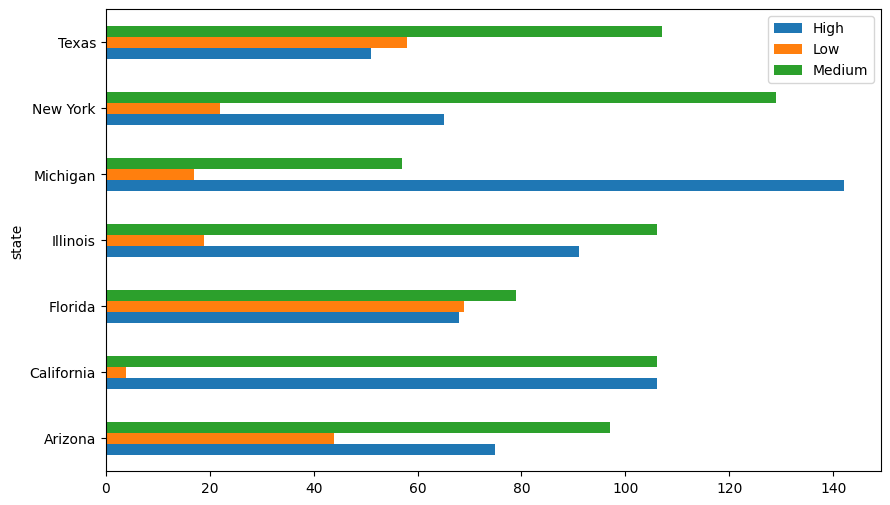

In [48]:
classification_counts.T.plot(
    kind="barh",      # horizontal bar chart
    stacked=False,    # separate bars for High/Medium/Low
    figsize=(10, 6)   # adjust size for readability
)


In [51]:
monthly_counts = unemp_bins.apply(lambda row: row.value_counts(), axis=1)


In [52]:
print(monthly_counts)

            High  Low  Medium
Date                         
2000-01-01   NaN  4.0     3.0
2000-02-01   NaN  4.0     3.0
2000-03-01   NaN  5.0     2.0
2000-04-01   NaN  5.0     2.0
2000-05-01   NaN  5.0     2.0
...          ...  ...     ...
2017-08-01   NaN  2.0     5.0
2017-09-01   NaN  3.0     4.0
2017-10-01   NaN  3.0     4.0
2017-11-01   NaN  3.0     4.0
2017-12-01   NaN  3.0     4.0

[216 rows x 3 columns]


In [53]:
# Assume: unemp is a DataFrame indexed by Date (Timestamp), columns are state names.
# Step 1: classify each observation element-wise
def classify_unemployment(x):
    if x > 6.5:
        return "High"
    elif x > 4.5:
        return "Medium"
    else:
        return "Low"

unemp_bins = unemp.map(classify_unemployment)

# Step 2: reshape to long form with state and date
long = (
    unemp_bins
    .stack()                     # index: (Date, state), value: label
    .rename("label")
    .to_frame()
)

# Step 3: add month-of-year
long["month"] = long.index.get_level_values(0).month  # 1..12

# Step 4: count occurrences by (state, month, label)
counts = (
    long.groupby(["state", "month", "label"])
        .size()
        .unstack("label")        # columns: High, Medium, Low
        .fillna(0)
        .astype(int)
)

# Optional: sort for cleaner plotting (e.g., by state then month)
counts = counts.sort_index(level=["state", "month"])



Text(0.5, 1.0, 'Counts of High/Medium/Low classifications by State and Month-of-Year')

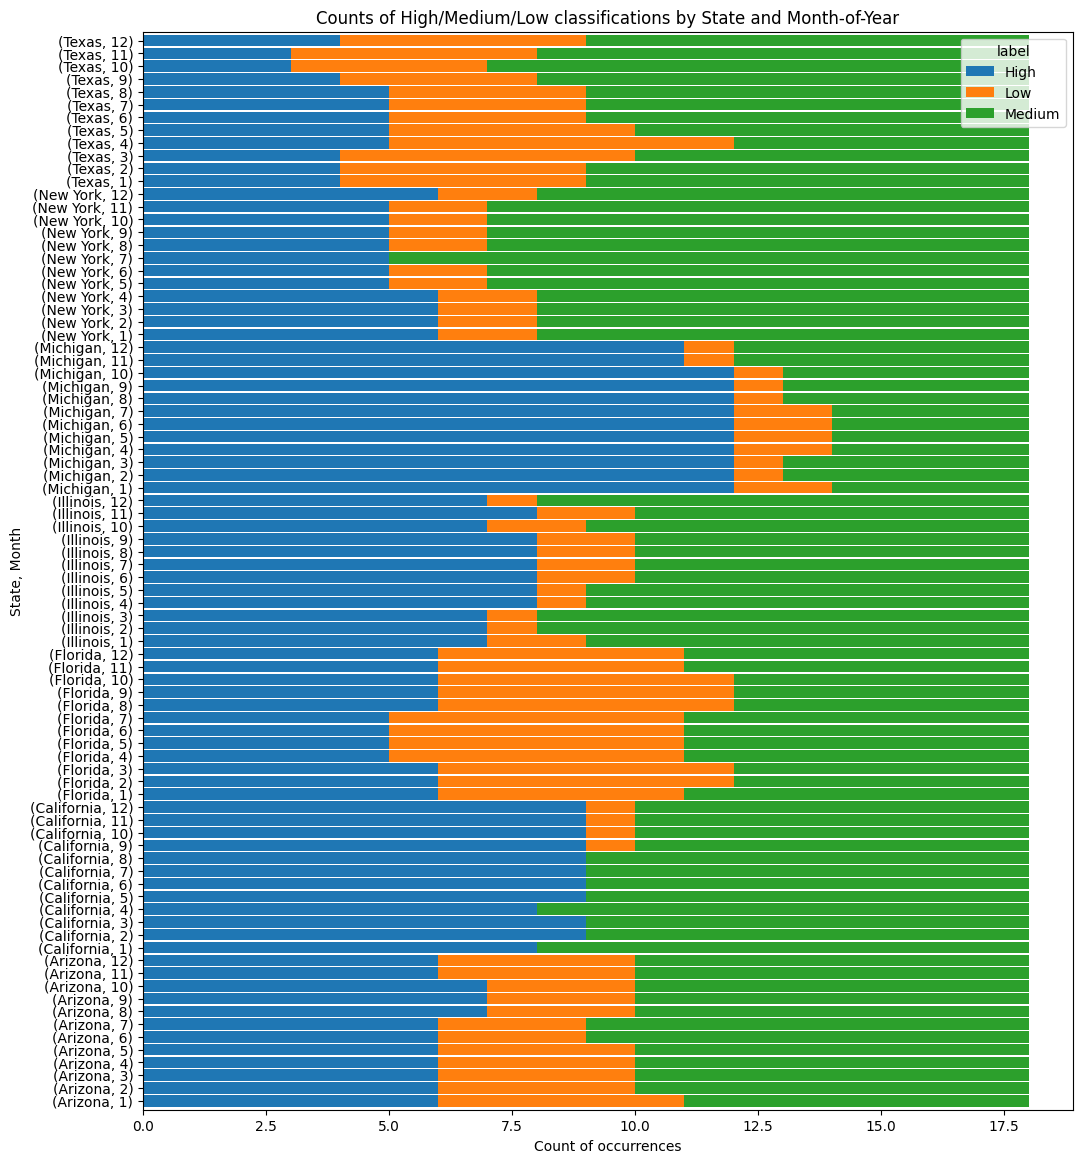

In [55]:
# This plots three side-by-side bars (High/Medium/Low) for each (state, month)
ax = counts.plot(
    kind="barh",
    stacked=True,
    figsize=(12, 14),
    width=0.9
)
ax.set_ylabel("State, Month")
ax.set_xlabel("Count of occurrences")
ax.set_title("Counts of High/Medium/Low classifications by State and Month-of-Year")


In [56]:
# Step 1: classify unemployment element-wise
def classify_unemployment(x):
    if x > 6.5:
        return "High"
    elif x > 4.5:
        return "Medium"
    else:
        return "Low"

unemp_bins = unemp.map(classify_unemployment)

# Step 2: reshape to long form
long = (
    unemp_bins
    .stack()              # (Date, state) → label
    .rename("label")
    .to_frame()
)

# Step 3: add month-of-year
long["month"] = long.index.get_level_values(0).month

# Step 4: group by (month, label, state) instead of (state, month, label)
counts = (
    long.groupby(["month", "label", "state"])
        .size()
        .unstack("state")        # columns = states
        .fillna(0)
        .astype(int)
)

# Step 5: make combined index labels like "Jan-High", "Feb-Medium", etc.
counts.index = counts.index.map(
    lambda idx: f"{idx[0]}-{idx[1]}"   # month-label string
)

# Now `counts` has rows like "1-High", "1-Medium", "1-Low", ..., "12-High", etc.
# Columns = states, values

<Axes: >

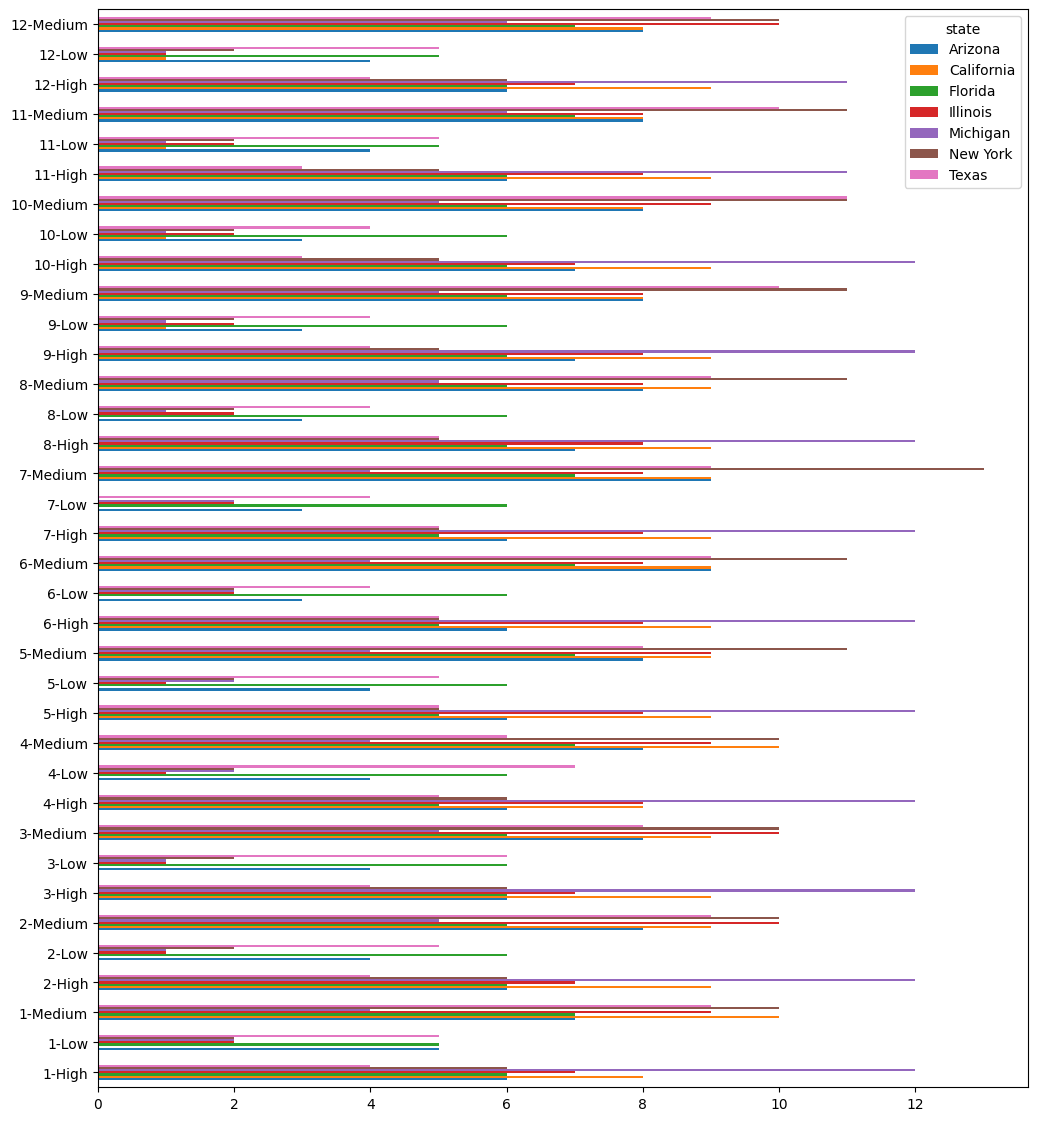

In [57]:
counts.plot(
    kind="barh",
    stacked=False,
    figsize=(12, 14)
)


In [58]:
unemp_small = unemp.head()  # Create smaller data so we can see what's happening
unemp_small

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [59]:
# list of booleans selects rows
unemp_small.loc[[True, True, True, False, False]]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5


In [60]:
# second argument selects columns, the  ``:``  means "all".
# here we use it to select all columns
unemp_small.loc[[True, False, True, False, True], :]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [61]:
# can use booleans to select both rows and columns
unemp_small.loc[[True, True, True, False, False], [True, False, False, False, False, True, True]]

state,Arizona,New York,Texas
Date,,,
2000-01-01,4.1,4.7,4.6
2000-02-01,4.1,4.7,4.6
2000-03-01,4.0,4.6,4.5


In [62]:
unemp_small["Texas"] < 4.5

Date
2000-01-01    False
2000-02-01    False
2000-03-01    False
2000-04-01     True
2000-05-01     True
Name: Texas, dtype: bool

In [63]:
unemp_small.loc[unemp_small["Texas"] < 4.5]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [64]:
unemp_small["New York"] > unemp_small["Texas"]

Date
2000-01-01    True
2000-02-01    True
2000-03-01    True
2000-04-01    True
2000-05-01    True
dtype: bool

In [65]:
big_NY = unemp_small["New York"] > unemp_small["Texas"]
unemp_small.loc[big_NY]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [66]:
small_NYTX = (unemp_small["Texas"] < 4.7) & (unemp_small["New York"] < 4.7)
small_NYTX

Date
2000-01-01    False
2000-02-01    False
2000-03-01     True
2000-04-01     True
2000-05-01     True
dtype: bool

In [67]:
unemp_small[small_NYTX]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [68]:
unemp_small["Michigan"].isin([3.3, 3.2])

Date
2000-01-01     True
2000-02-01     True
2000-03-01     True
2000-04-01     True
2000-05-01    False
Name: Michigan, dtype: bool

In [69]:
# now select full rows where this Series is True
unemp_small.loc[unemp_small["Michigan"].isin([3.3, 3.2])]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4


In [70]:
# Step 3: construct the DataFrame of bools
high = unemp > 6.5
high.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,False,False,False,False,False,False,False
2000-02-01,False,False,False,False,False,False,False
2000-03-01,False,False,False,False,False,False,False
2000-04-01,False,False,False,False,False,False,False
2000-05-01,False,False,False,False,False,False,False


In [71]:
# Step 2: use the .all method on axis=1 to get the dates where all states have a True
all_high = high.all(axis=1)
all_high.head()

Date
2000-01-01    False
2000-02-01    False
2000-03-01    False
2000-04-01    False
2000-05-01    False
dtype: bool

In [72]:
# Step 1: Call .sum to add up the number of True values in `all_high`
#         (note that True == 1 and False == 0 in Python, so .sum will count Trues)
msg = "Out of {} months, {} had high unemployment across all states"
print(msg.format(len(all_high), all_high.sum()))

Out of 216 months, 41 had high unemployment across all states


In [73]:
# Step 1: Call .sum to add up the number of True values in `all_high`
#         (note that True == 1 and False == 0 in Python, so .sum will count Trues)
msg = "Out of {} months, {} had high unemployment across all states"
print(msg.format(len(all_high), all_high.sum()))

Out of 216 months, 41 had high unemployment across all states


In [74]:
# California unemployment rates
california = unemp["California"]

# California classifications (Low/Medium/High)
california_bins = unemp_bins["California"]

# Group unemployment rates by classification and compute mean
california.groupby(california_bins).mean()


California
High      9.249057
Low       4.500000
Medium    5.454717
Name: California, dtype: float64

In [81]:
all_states = unemp[["California", "Arizona", "Florida", "Illinois", "Michigan", "New York", "Texas"]]
selected_bins = unemp_bins[["California", "Arizona", "Florida", "Illinois", "Michigan", "New York", "Texas"]]
all_states.groupby(selected_bins).mean()

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

In [82]:
# 1. Reshape unemployment rates and bins to long form
rates = all_states.stack().rename("rate")          # unemployment values
labels = selected_bins.stack().rename("label")     # Low/Medium/High labels

# 2. Combine into one DataFrame
long = rates.to_frame().join(labels.to_frame())
long = long.reset_index().rename(columns={"level_0":"Date", "level_1":"state"})

# 3. Group by state and label, then compute mean unemployment
state_label_means = (
    long.groupby(["state", "label"])["rate"]
        .mean()
        .unstack("label")   # columns: High, Medium, Low
)

print(state_label_means)


label           High       Low    Medium
state                                   
Arizona     8.733333  4.063636  5.436082
California  9.249057  4.500000  5.454717
Florida     9.155882  3.807246  5.331646
Illinois    8.740659  4.352632  5.618868
Michigan    8.762676  3.876471  5.407018
New York    8.169231  4.340909  5.361240
Texas       7.552941  4.298276  5.567290


In [84]:
# 1) Compute sample-wide mean per month (across states)
overall_mean = unemp.mean(axis=1)

# Step 2: filter months where overall mean > 7
bad_times = unemp.loc[overall_mean > 7]

# Step 3: compute mean unemployment for each state during bad times
bad_times_means = bad_times.mean()

# Step 4: rank states (lowest mean = best performance)
bad_times_means.sort_values()


state
Texas          7.131818
New York       8.131818
Arizona        9.007576
Florida        9.225758
Illinois       9.480303
California    10.651515
Michigan      10.692424
dtype: float64